In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [81]:
import numpy as np


In [83]:
images_size = 256
batches_size =32
chanels =3
EPOCHS =30

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "train",
    shuffle =True,
    image_size = (images_size, images_size),
    batch_size = batches_size
)

Found 3000 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names

['Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___healthy']

In [7]:
len(dataset)

94

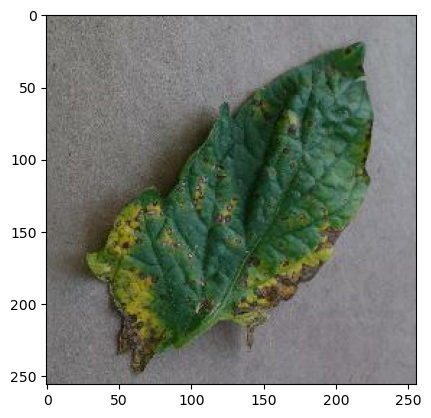

In [8]:
for image,batch in dataset.take(1):
    plt.imshow(image[1].numpy().astype("uint8"))

In [9]:
len(dataset)

94

In [10]:
train_size =0.9
94 * train_size

84.60000000000001

In [11]:
train_ds = dataset.take(84)
len(train_ds)

84

In [12]:
test_ds = dataset.skip(84)
len(test_ds)

10

In [13]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "val",
    shuffle =True,
    image_size = (images_size, images_size),
    batch_size = batches_size
)

Found 300 files belonging to 3 classes.


In [14]:
len(val_ds)

10

In [15]:
a = val_ds.class_names
a

['Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___healthy']

In [16]:
len(train_ds)

84

In [17]:
len(val_ds)

10

In [18]:
len(test_ds)

10

In [ ]:
!pip install jupyter_contrib_nbextensions

In [19]:
train_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
test_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
val_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [54]:
from tensorflow.keras import layers  #
from tensorflow.keras.layers import Resizing, Rescaling  

resize_and_rescale = tf.keras.Sequential([
    Resizing(images_size, images_size),  
    Rescaling(1.0/255),  
])

In [71]:
data_augmentation = tf.keras.Sequential([
        layers.RandomFlip("horizontal_and_vertical"),  
        layers.RandomRotation(0.2),
    ])

In [107]:
input_shape = ( images_size, images_size, chanels)  # Define the input shape
n_classes = 3

model = models.Sequential([
    layers.InputLayer(shape= input_shape),
    resize_and_rescale,  
    layers.Conv2D(32, (3, 3), activation='relu'),  
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_60 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_60 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_61 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_62 (Conv2D)                   │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_62 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_63 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_63 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_64 (Conv2D)                   │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_64 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 277,891 (1.06 MB)

 Trainable params: 277,891 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [115]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [ ]:
HISTORY = model.fit(
    train_ds,
    epochs = EPOCHS,
    validation_data = val_ds,
    verbose =1,
)

In [132]:
score = model.evaluate(test_ds)
print(score)

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 213ms/step - accuracy: 0.9537 - loss: 0.1502
[0.1639789193868637, 0.9519230723381042]


first image to predict
actual label=  Tomato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
predected value =  Tomato___Late_blight
confidence is =  100.0


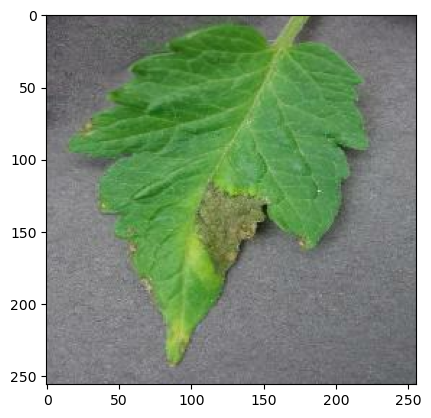

In [177]:
for images_batch, label_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_batch = label_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label= ", class_names[first_batch])


    batch_predection= model.predict(images_batch)
    print("predected value = ",class_names[np.argmax(batch_predection[0])])

    confidence = round(100 * (np.max(batch_predection)), 2)
    print("confidence is = ",confidence)



In [181]:
model_version = 1.1
model.save(f"models/model_v{model_version}.keras")



In [187]:
model.save("tomato.keras")